In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from brainpipe.classification import *

from brainpipe.statistics import *
import scipy.io as sio

# Import files

In [2]:
grp = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16',
           'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31',
           'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39','E40', 'E41', 'E42', 'E43', 'E44', 'E45','E46',
           'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61',
           'E62', 'E63','E64','E65']

S8


<IPython.core.display.Javascript object>


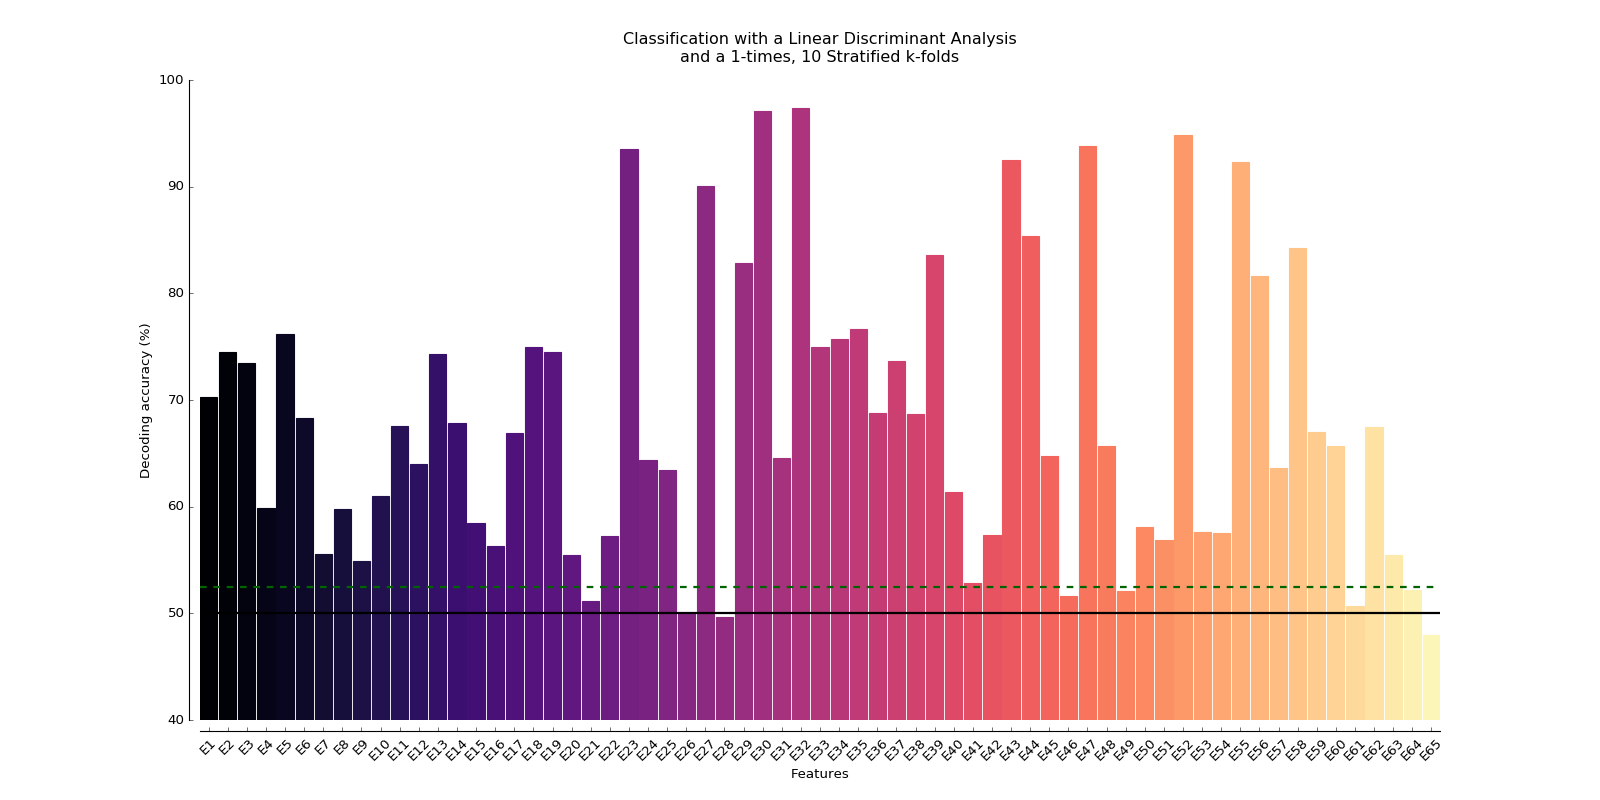

In [3]:
# filepath = "/home/thomasthiery/Dropbox/Rep_MATLAB/Analysis_sevo_2_7_new/c1_c2_2sec/"
filepath = './'

subject_ids = ['S8']

for subject in subject_ids:

    filename1 = subject+ "_conscious_c2.mat"
    filename2 = subject+"_unconscious_c2.mat"

    conscious = sio.loadmat(filepath + filename1)[subject+ "_conscious_c2"]
    unconscious = sio.loadmat(filepath + filename2)[subject+ "_unconscious_c2"]

    a = np.zeros((conscious.shape[1]))
    b = np.ones((unconscious.shape[1]))
    
    conscious_unconscious = np.concatenate((conscious, unconscious),axis=1).T

    vectorlabel = np.concatenate((a, b), axis=0)
    
    cvO = defCv(vectorlabel, rep=1)
    #print(cvO)

    clfO = defClf(vectorlabel, clf='lda')
    #print(clfO)

    cl = classify(vectorlabel, clf=clfO, cvtype=cvO)
    #print(cl)
    
    
    da, pvalue, daperm = cl.fit(conscious_unconscious, n_perm=1, grp=grp , method='label_rnd')

    sio.savemat(subject+'da_c2_new_sf_shallow_final_intra',{subject+'da_c2_new_sf_shallow_final_intra': da})
    sio.savemat(subject+'pvalue_c2_new_sf_shallow_final_intra',{subject+'pvalue_c2_new_sf_shallow_final_intra': pvalue})
    sio.savemat(subject+'da_perm_c2_new_sf_shallow_final_intra',{subject+'da_perm_c2_new_sf_shallow_final_intra': daperm})
    print(subject)
    fig = plt.figure(1, figsize=(20,10))

    cl.daplot(da, daperm=daperm, chance_method='perm', rmax=['top', 'right'],
            dpax=['bottom', 'left'], cmap='magma', ylim=[40,100], chance_unique=True,chance_level = 0.01,
            chance_color='darkgreen')
    fig.savefig(subject+'c2_new_sf_shallow_final.png', dpi=300, bbox_inches='tight')
    # Display informations about features :
    cl.info.to_excel(subject+'c2_new_sf_shallow_final_intra.xlsx')
    #plt.clf()
    #plt.close()